In [34]:
# !pip install matplotlib-venn
# !apt-get -qq install -y libfluidsynth1
!pip install kmodes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [35]:
from kmodes.kprototypes import KPrototypes

In [5]:
df = pd.read_excel("/content/doctors_data.xlsx")

In [6]:
df.head()

,Doctor Name,Speciality,Education,Registration No.,Experience,Location
0,Dr A Anitha,nephrologist,"MBBS, DNB (General Medicine), DNB (Nephrology)",1835134,16 years experience overall,"Jayanagar , Bangalore"
1,Dr A D Suri,nephrologist,"MBBS ,MD Medicine, DM Nephrology,DNB Nephrology",5028507,22 years experience overall,"Bhopal , Bhopal"
2,Dr A G K Gokhale,cardiothoracic and vascular surgery,"MS, MCH(CMC Vellore), DNB, SMP(IMC), Dsc(Hons)...",695708,32 years experience overall,"Jubileehills , Hyderabad"
3,Dr A Jayavelu,neurologist,"MD- Gen.Medicine, DM - Neurology",80374,21 years experience overall,"Seepat Road , Bilaspur"
4,Dr A K Bardhan,cardiologist,"MBBS (1971), MD (1979), Dip. Card. (1976), FCCP",4228,30 years experience overall,"Canal Circular Road , Kolkata"


In [7]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [10]:
# Use LabelEncoder to convert categorical columns to numerical values
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [11]:
# Select features for clustering
features_for_clustering = df[["Doctor Name", "Speciality", "Education", "Registration No.", "Experience", "Location"]]


In [12]:
# Standardize numerical features
numeric_cols = ["Registration No.", "Experience"]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [13]:
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])


In [14]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)


In [15]:
# Create a pipeline for preprocessing and clustering
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)
])

In [36]:
#Apply k-modes clustering
kmodes = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1, random_state=42)

In [37]:
# Create a pipeline for preprocessing and clustering
kmodes_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmodes', kmodes)
])

In [40]:
# Fit and predict
df['kmeans_Cluster'] = kmeans_pipeline.fit_predict(features_for_clustering)
df['kmodes_Cluster'] = kmodes_pipeline.fit_predict(features_for_clustering)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 171.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8, cost: 171.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 176.0
Best run was number 2


In [41]:
# Display the clustered data
print("\nClustered Data:")
print(df.head())


Clustered Data:
   Doctor Name  Speciality  Education  Registration No.  Experience  Location  \
0            0          17         23           1835134           6        13   
1            1          17         16           5028507          13         3   
2            2           2         69            695708          20        14   
3            3          18         62             80374          12        27   
4            4           1         14              4228          18         4   

   kmeans_Cluster  kmodes_Cluster  
0               2               0  
1               0               0  
2               2               0  
3               2               0  
4               2               0  


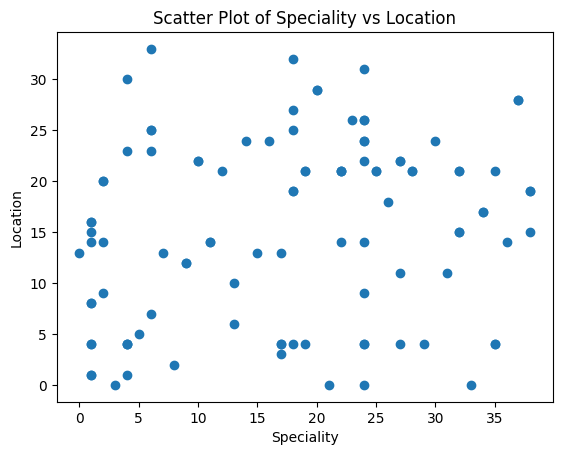

In [47]:
# Visualization example: Scatter plot
plt.scatter(df['Speciality'], df['Location'])
plt.title('Scatter Plot of Speciality vs Location')
plt.xlabel('Speciality')
plt.ylabel('Location')
plt.show()

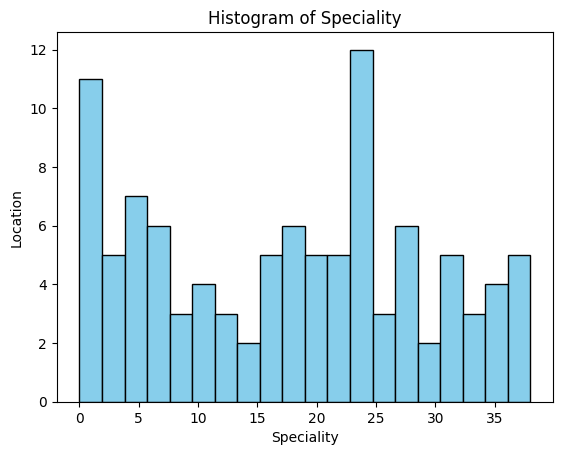

In [46]:
# Visualization example: Histogram
plt.hist(df['Speciality'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Speciality')
plt.xlabel('Speciality')
plt.ylabel('Location')
plt.show()

In [48]:
# __int__.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [49]:
# Doctor_visualization.py


class Visualization:
  def scatter_plot_vis(column1,column2):
    plt.scatter(df[column1], df[column2])
    plt.title('Scatter Plot of '+column1+' vs '+column2+'')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()
    """
    Encodes categorical columns in a DataFrame using LabelEncoder.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing categorical columns to be encoded.

    Returns:
    - pandas.DataFrame: A new DataFrame with encoded numerical values for categorical columns.

    """


  def histogram_vis(column1,column2):
    plt.hist(df[column1], bins=20, color='skyblue', edgecolor='black')
    plt.title('hisogram  Plot of '+column1+' and '+column2+'')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

    """
    Creates and displays a histogram plot for two columns in a DataFrame.

    Parameters:
    - column1 (str): Name of the first column for the histogram.
    - column2 (str): Name of the second column for the histogram.

    Returns:
    - None

    """


In [ ]:
# Doctor_clustering.py

#from Doctor_visualization import Visualization


class Clustering:
  def cluster_features(*column_names):
    # Select features for clustering
    features_for_clustering = df[column_names]
    return features_for_clustering

    """
    Selects specific columns from a DataFrame for clustering.

    Parameters:
    - *column_names (str): Variable-length argument list of column names to be selected for clustering.

    Returns:
    - pandas.DataFrame: Subset of the DataFrame containing only the specified columns.


    """

  def category_column_encoding(df):
    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    # Use LabelEncoder to convert categorical columns to numerical values
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    return df
    """
    Encodes categorical columns in a DataFrame using LabelEncoder.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing categorical columns to be encoded.

    Returns:
    - pandas.DataFrame: A new DataFrame with encoded numerical values for categorical columns.


    """

  def numerical_column_scaling(df, *num_cols):
    # Standardize numerical features
    numeric_cols = num_cols
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    return numeric_transformer, numeric_cols
    """
    Applies numerical column scaling to specified columns in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing numerical columns to be scaled.
    - *num_cols (str): Variable-length argument list of numerical column names to be scaled.

    Returns:
    - sklearn.compose.ColumnTransformer: A ColumnTransformer object configured for numerical scaling.
    - list: List of numerical column names specified for scaling.

    """

  def data_transform (numeric_transformer, numeric_cols):
    # Combine transformers
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])
    return preprocessor
    """
    Applies data transformation using a pre-defined numeric transformer on specified columns.

    Parameters:
    - numeric_transformer (sklearn.pipeline.Pipeline): Pre-defined numeric transformer for scaling.
    - numeric_cols (list): List of numerical column names to be transformed.

    Returns:
    - sklearn.compose.ColumnTransformer: A ColumnTransformer object configured for data transformation.

    """

  def kmeans_clustering (preprocessor):
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    # Create a pipeline for preprocessing and clustering
    kmeans_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmeans', kmeans)
    ])
    return kmeans_pipeline
    """
    Applies K-means clustering on pre-processed data using a specified preprocessor.

    Parameters:
    - preprocessor (sklearn.compose.ColumnTransformer): Preprocessor for data transformation.

    Returns:
    - sklearn.pipeline.Pipeline: A pipeline combining the preprocessor and K-means clustering.

    """

  def kmodes_clustering(preprocessor):
    #Apply k-modes clustering
    kmodes = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1, random_state=42)
    # Create a pipeline for preprocessing and clustering
    kmodes_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmodes', kmodes)
    ])
    return kmodes_pipeline
    """
    Applies K-Modes clustering on pre-processed data using a specified preprocessor.

    Parameters:
    - preprocessor (sklearn.compose.ColumnTransformer): Preprocessor for data transformation.

    Returns:
    - sklearn.pipeline.Pipeline: A pipeline combining the preprocessor and K-Modes clustering.

    """

  def clusters_fit_predict(df, kmeans_pipeline,kmodes_pipeline, features_for_clustering):
    # Fit and predict
    df['kmeans_Cluster'] = kmeans_pipeline.fit_predict(features_for_clustering)
    df['kmodes_Cluster'] = kmodes_pipeline.fit_predict(features_for_clustering)
    return df
    """
    Fits and predicts clusters using K-means and K-Modes pipelines on specified features.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.
    - kmeans_pipeline (sklearn.pipeline.Pipeline): Pipeline for K-means clustering.
    - kmodes_pipeline (sklearn.pipeline.Pipeline): Pipeline for K-Modes clustering.
    - features_for_clustering (pandas.DataFrame): Subset of DataFrame containing features for clustering.

    Returns:
    - pandas.DataFrame: The input DataFrame with additional columns for K-means and K-Modes cluster labels.

    """

#read_file here
df = pd.read_excel("/content/doctors_data.xlsx")

cluster_object = Clustering()
column_list = ["Doctor Name", "Speciality", "Education", "Registration No.", "Experience", "Location"]
features_for_clustering = cluster_object.cluster_features(column_list)
df = cluster_object.category_column_encoding(df)
num_cols = ["Registration No.", "Experience"]
numeric_transformer, numeric_cols = cluster_object.numerical_column_scaling(df,)
preprocessor = cluster_object.data_transform(numeric_transformer, numeric_cols)
kmeans_pipeline = cluster_object.kmeans_clustering(preprocessor)
kmodes_pipeline = cluster_object.kmodes_clustering(preprocessor)
df = cluster_object.clusters_fit_predict(df, kmeans_pipeline,kmodes_pipeline, features_for_clustering)

visual_object = Visualization()
visual_object.scatter_plot_vis('Speciality','Location')
visual_object.histogram_vis('Speciality','Location')


